In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load Dataset
df = pd.read_csv("Activity_data.csv")
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop Time column
X = df.drop(['Time', 'Activity'], axis=1)
y = df['Activity']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   Time  frontal_axis_Acceleration  vertical_axis+_Acceleration  \
0  0.00                  -0.232160                     0.215880   
1  0.25                  -0.056282                     0.043636   
2  0.50                   0.143050                     0.296270   
3  0.75                   0.318930                     0.284780   
4  1.05                   0.412730                     0.135500   

   lateral_axis_Acceleration  Antenna_ID_Sensor  RSSI    Phase  Frequency  \
0                   -1.18820                  2 -48.5  2.74430     920.75   
1                   -1.14260                  2 -50.0  2.36540     921.75   
2                   -1.33640                  3 -59.5  0.20709     922.25   
3                   -0.92593                  2 -51.0  0.41571     923.25   
4                   -1.02860                  2 -44.5  4.45470     920.25   

   Activity  
0         3  
1         3  
2         3  
3         3  
4         3  
Missing values:
 Time                           0


In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model Evaluation Function
def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


SVM Linear
Accuracy: 0.9120191667775855
Precision: 0.6699987761885148
Recall: 0.5897706346834872
F1 Score: 0.5918248064006087


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


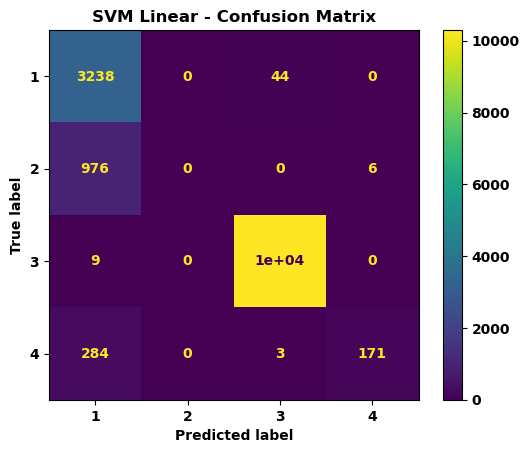


SVM RBF
Accuracy: 0.9691867429788367
Precision: 0.9397220302791647
Recall: 0.8278186450383644
F1 Score: 0.8587178889807168


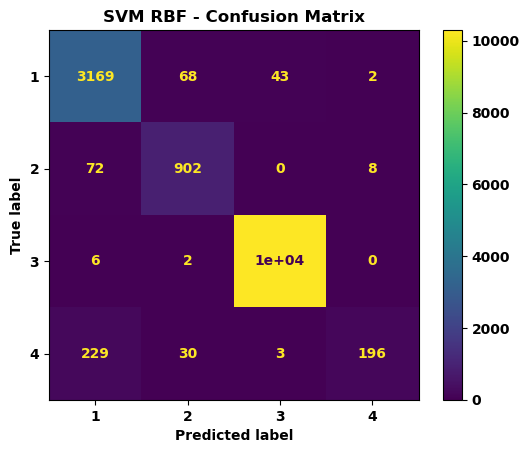


SVM Polynomial
Accuracy: 0.9657260748036737
Precision: 0.9317259495479364
Recall: 0.8203413679001748
F1 Score: 0.8517218727946833


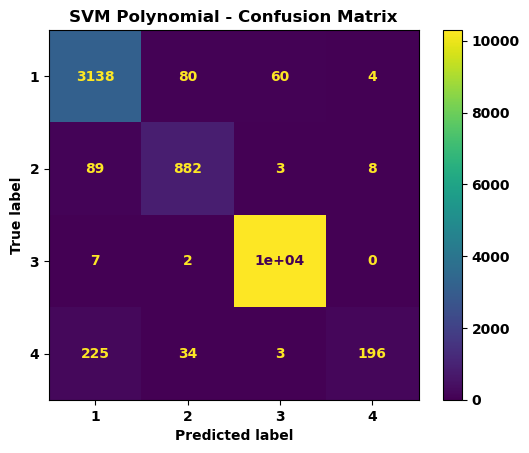


KNN (k=5)
Accuracy: 0.9801011579928125
Precision: 0.9465287784301115
Recall: 0.907697184100777
F1 Score: 0.9243809843726298


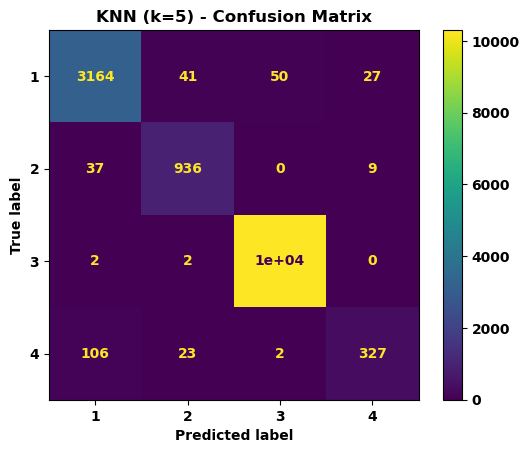


Naive Bayes
Accuracy: 0.9415013975775323
Precision: 0.891628681496595
Recall: 0.7415097626555142
F1 Score: 0.7916755695800702


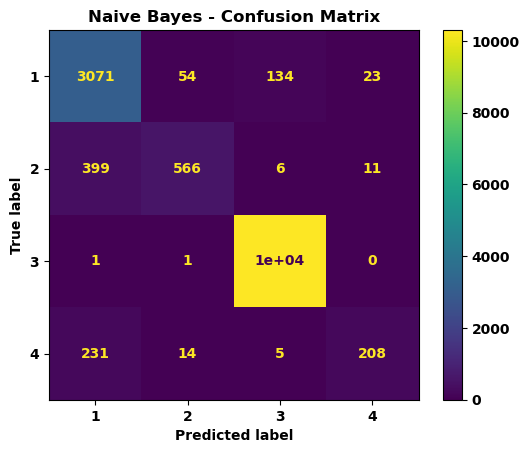


LDA
Accuracy: 0.9067616132037801
Precision: 0.8207981600296997
Recall: 0.5586410842393202
F1 Score: 0.5714973664141539


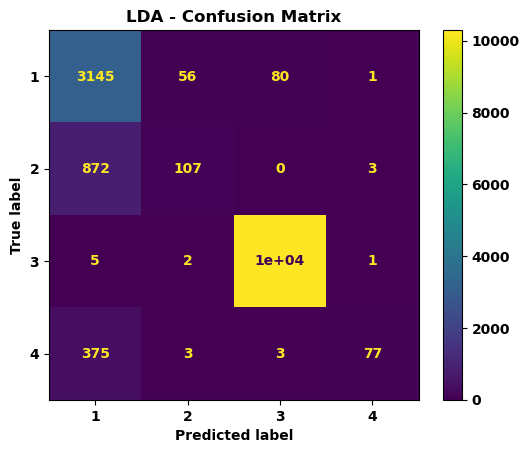

In [4]:
# Full Dataset Classifiers
evaluate_model(SVC(kernel='linear'), X_train, X_test, y_train, y_test, "SVM Linear")
evaluate_model(SVC(kernel='rbf'), X_train, X_test, y_train, y_test, "SVM RBF")
evaluate_model(SVC(kernel='poly'), X_train, X_test, y_train, y_test, "SVM Polynomial")
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test, "KNN (k=5)")
evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test, "Naive Bayes")
evaluate_model(LDA(), X_train, X_test, y_train, y_test, "LDA")



KDA (Poly KernelPCA, 5 comps)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


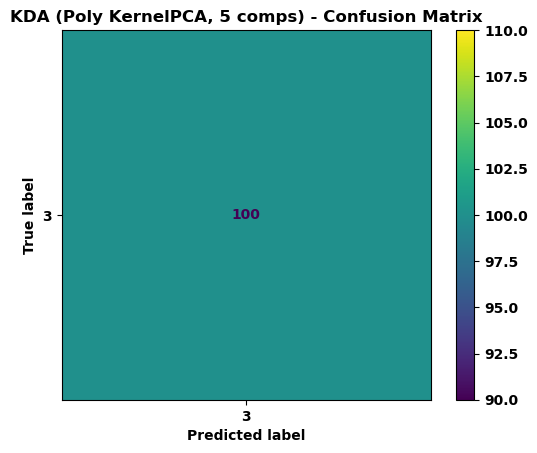

In [ ]:
# Sample first 500 rows for faster execution
X_sampled = X_scaled[:500]
y_sampled = y[:500]

# Fast KDA with Polynomial KernelPCA
kpca_poly = KernelPCA(n_components=5, kernel='poly', degree=2, fit_inverse_transform=False)
X_kpca_poly = kpca_poly.fit_transform(X_sampled)

# Use nonstratified split to avoid ValueError
X_kpca_poly_train, X_kpca_poly_test, y_kpca_poly_train, y_kpca_poly_test = train_test_split(X_kpca_poly, y_sampled, test_size=0.2, random_state=42, stratify=None)

evaluate_model(LDA(), X_kpca_poly_train, X_kpca_poly_test, y_kpca_poly_train, y_kpca_poly_test,"KDA (Poly KernelPCA, 5 comps)")


PCA Components: 6


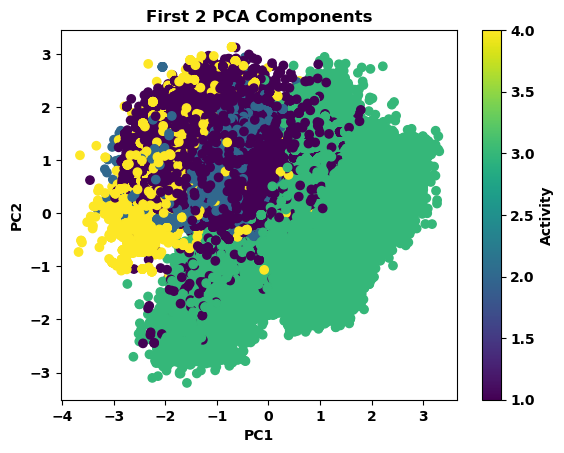

In [7]:
# PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("PCA Components:", X_pca.shape[1])

# Visualize First 2 Components
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("First 2 PCA Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Activity")
plt.show()

In [ ]:
# Chi2 needs nonnegative values
X_minmax = MinMaxScaler().fit_transform(X)
X_chi2 = SelectKBest(chi2, k=5).fit_transform(X_minmax, y)

# Mutual Info and LASSO can use standardized features
X_mi = SelectKBest(mutual_info_classif, k=5).fit_transform(X_scaled, y)

lasso = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', max_iter=1000).fit(X_scaled, y)
X_lasso = SelectFromModel(lasso, prefit=True).transform(X_scaled)



SVM Linear
Accuracy: 0.9120191667775855
Precision: 0.6699987761885148
Recall: 0.5897706346834872
F1 Score: 0.5918248064006087


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


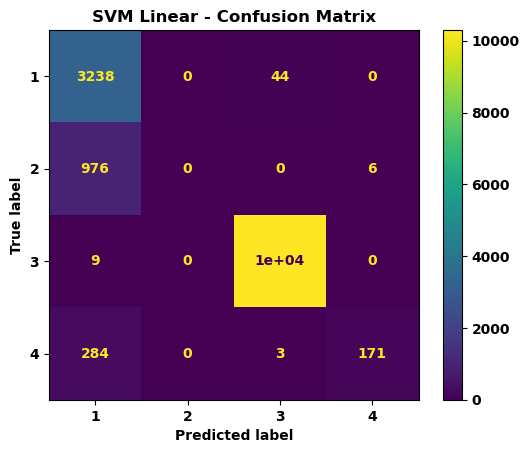


SVM RBF
Accuracy: 0.9691867429788367
Precision: 0.9397220302791647
Recall: 0.8278186450383644
F1 Score: 0.8587178889807168


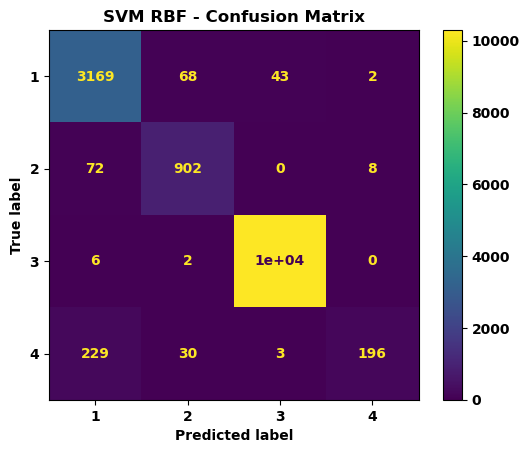


SVM Polynomial
Accuracy: 0.9657260748036737
Precision: 0.9317259495479364
Recall: 0.8203413679001748
F1 Score: 0.8517218727946833


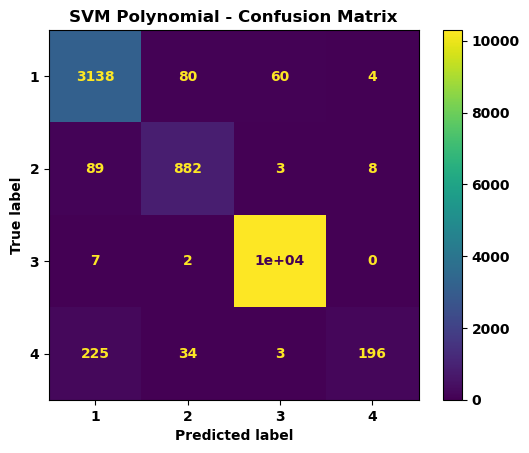


KNN (k=5)
Accuracy: 0.9801011579928125
Precision: 0.9465287784301115
Recall: 0.907697184100777
F1 Score: 0.9243809843726298


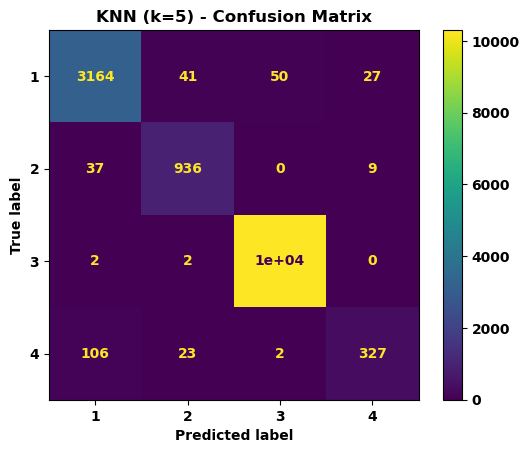


Naive Bayes
Accuracy: 0.9415013975775323
Precision: 0.891628681496595
Recall: 0.7415097626555142
F1 Score: 0.7916755695800702


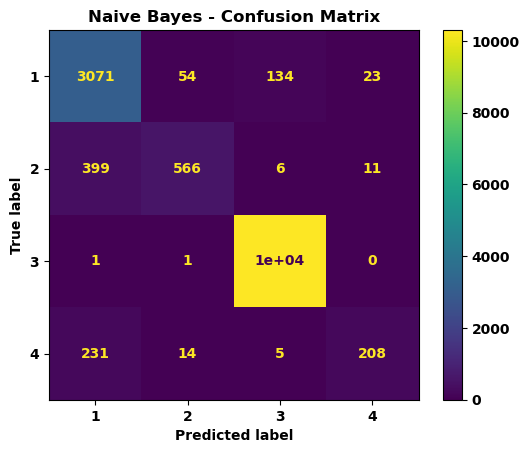


LDA
Accuracy: 0.9067616132037801
Precision: 0.8207981600296997
Recall: 0.5586410842393202
F1 Score: 0.5714973664141539


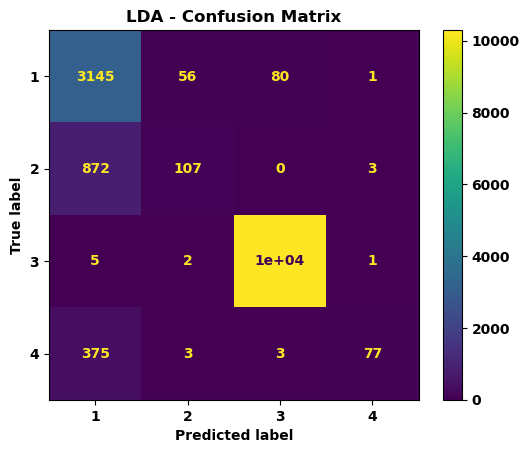

In [ ]:
# Full Dataset Classifiers
evaluate_model(SVC(kernel='linear'), X_train, X_test, y_train, y_test, "SVM Linear")
evaluate_model(SVC(kernel='rbf'), X_train, X_test, y_train, y_test, "SVM RBF")
evaluate_model(SVC(kernel='poly'), X_train, X_test, y_train, y_test, "SVM Polynomial")
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test, "KNN (k=5)")
evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test, "Naive Bayes")
evaluate_model(LDA(), X_train, X_test, y_train, y_test, "LDA")


In [ ]:
# Split and Evaluate models on selected feature sets
def test_selected_features(X_selected, label):
    X_tr, X_te, y_tr, y_te = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
    evaluate_model(SVC(kernel='linear'), X_tr, X_te, y_tr, y_te, f"SVM on {label}")
    evaluate_model(KNeighborsClassifier(n_neighbors=5), X_tr, X_te, y_tr, y_te, f"KNN on {label}")
    evaluate_model(GaussianNB(), X_tr, X_te, y_tr, y_te, f"Naive Bayes on {label}")
    evaluate_model(LDA(), X_tr, X_te, y_tr, y_te, f"LDA on {label}")


SVM on PCA
Accuracy: 0.9031678424064954
Precision: 0.6651333323773598
Recall: 0.5832239340451499
F1 Score: 0.5867769993437799


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


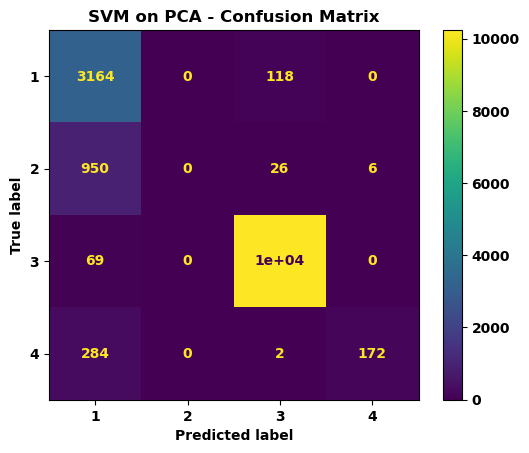


KNN on PCA
Accuracy: 0.9796352988153867
Precision: 0.9455232582951395
Recall: 0.9098419054942132
F1 Score: 0.9254799719388231


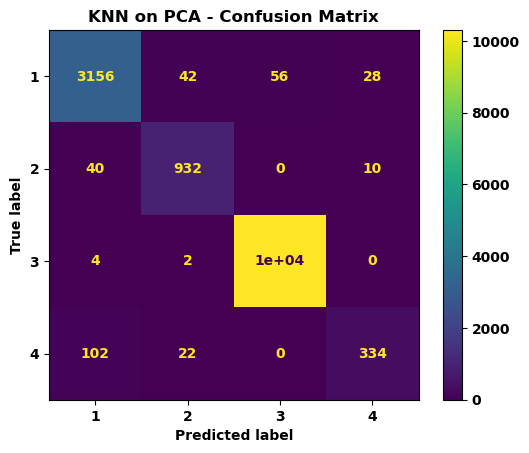


Naive Bayes on PCA
Accuracy: 0.9010382004525489
Precision: 0.8854254098924175
Recall: 0.5744778539461678
F1 Score: 0.5947861560597669


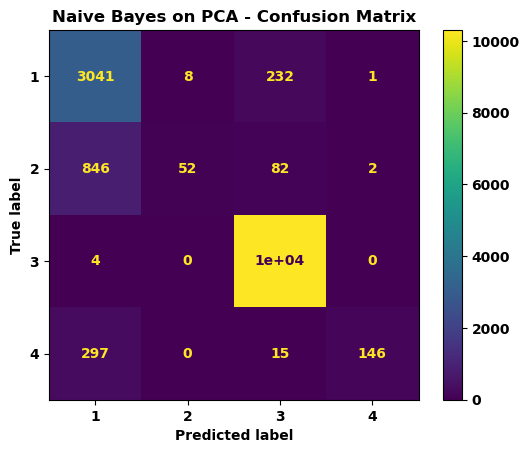


LDA on PCA
Accuracy: 0.8903234393717556
Precision: 0.7477652550267723
Recall: 0.5466236276513261
F1 Score: 0.55197474238358


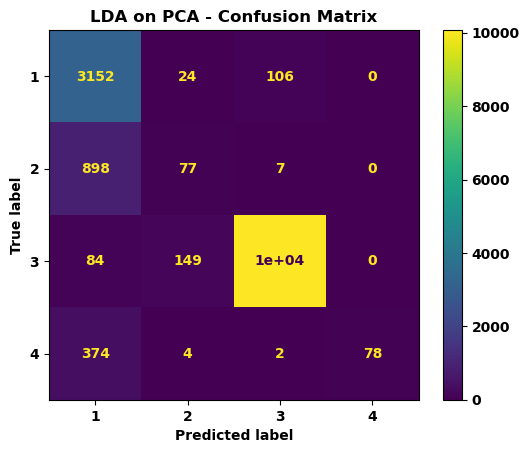


SVM on Chi2
Accuracy: 0.9100891787568215
Precision: 0.6688484731209345
Recall: 0.5874058838640354
F1 Score: 0.5903501654005232


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


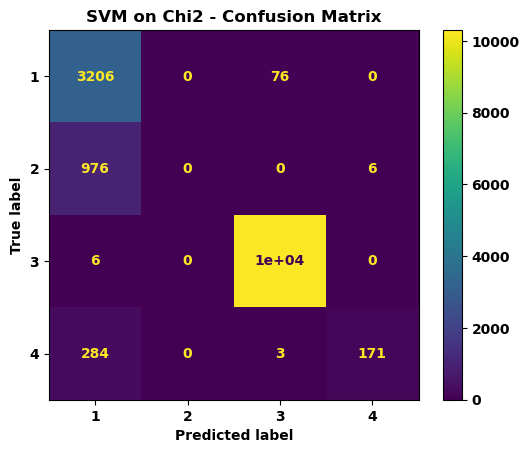


KNN on Chi2
Accuracy: 0.9829628643684281
Precision: 0.9502657580609978
Recall: 0.9161390889995367
F1 Score: 0.9312653540866512


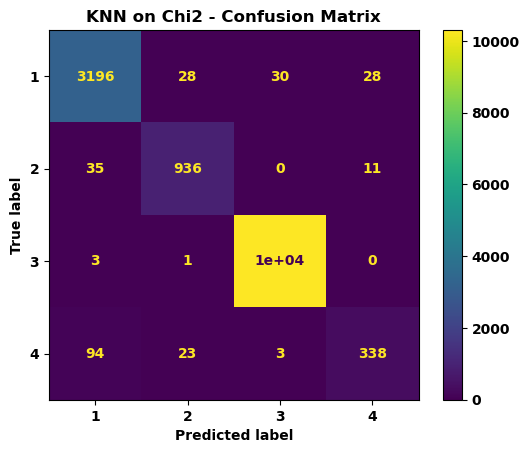


Naive Bayes on Chi2
Accuracy: 0.9417010515107148
Precision: 0.8924358396738729
Recall: 0.7420951006901684
F1 Score: 0.7923158910799919


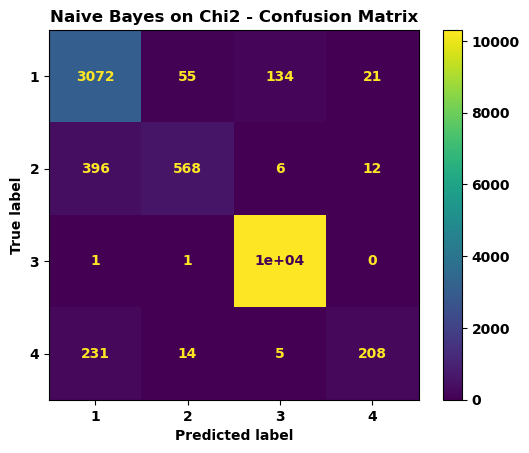


LDA on Chi2
Accuracy: 0.9055636896046853
Precision: 0.8142379973507898
Recall: 0.5516811373362398
F1 Score: 0.5608508870734563


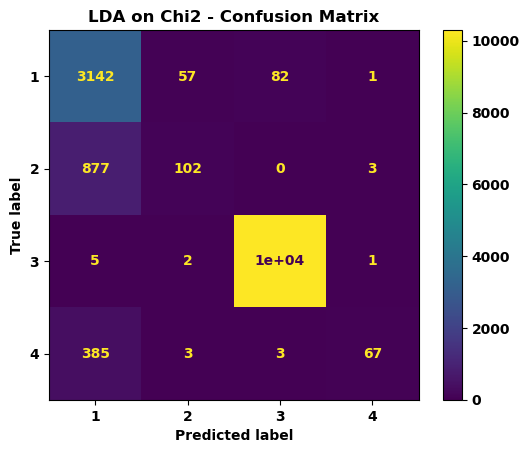


SVM on Mutual Info
Accuracy: 0.9117529615333422
Precision: 0.6696932893619616
Recall: 0.5881088176759741
F1 Score: 0.5899716979987868


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


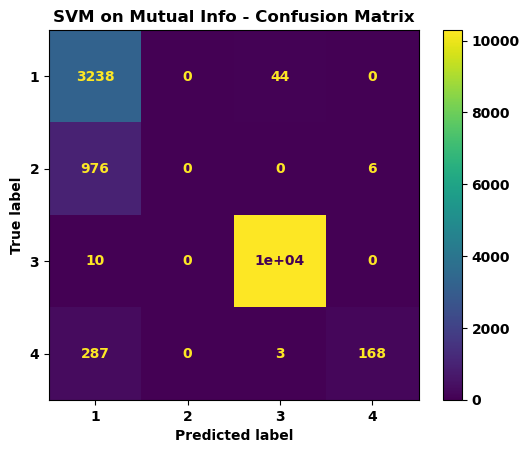


KNN on Mutual Info
Accuracy: 0.9827632104352456
Precision: 0.9508416650272413
Recall: 0.9154882011695
F1 Score: 0.9312222046637616


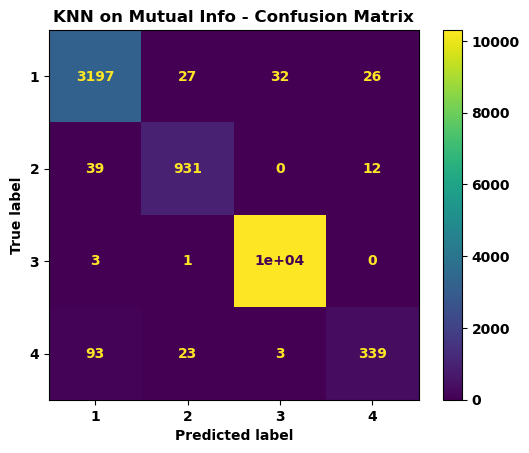


Naive Bayes on Mutual Info
Accuracy: 0.9417010515107148
Precision: 0.8924358396738729
Recall: 0.7420951006901684
F1 Score: 0.7923158910799919


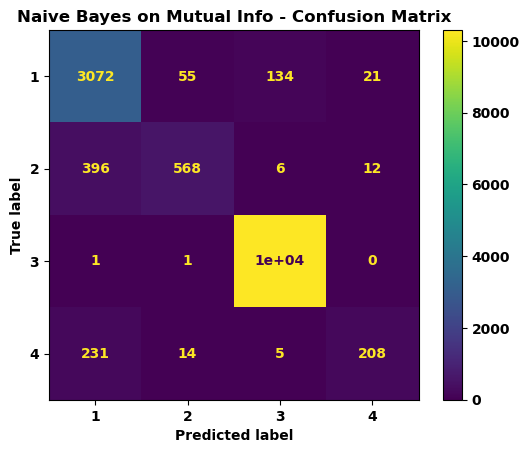


LDA on Mutual Info
Accuracy: 0.9055636896046853
Precision: 0.8142379973507898
Recall: 0.5516811373362398
F1 Score: 0.5608508870734563


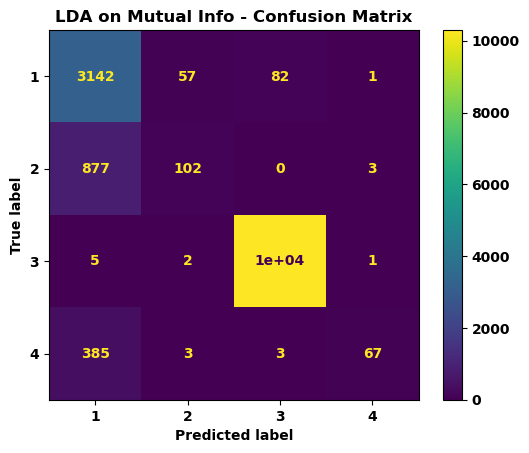


SVM on LASSO
Accuracy: 0.9120191667775855
Precision: 0.6699987761885148
Recall: 0.5897706346834872
F1 Score: 0.5918248064006087


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


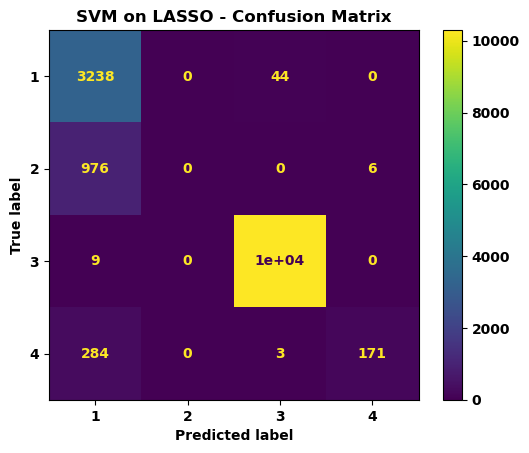


KNN on LASSO
Accuracy: 0.9801011579928125
Precision: 0.9465287784301115
Recall: 0.907697184100777
F1 Score: 0.9243809843726298


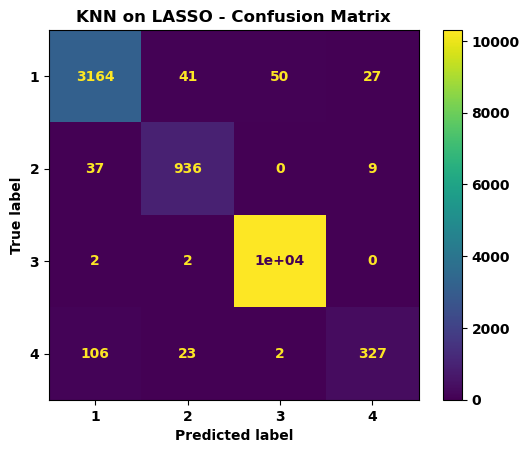


Naive Bayes on LASSO
Accuracy: 0.9415013975775323
Precision: 0.891628681496595
Recall: 0.7415097626555142
F1 Score: 0.7916755695800702


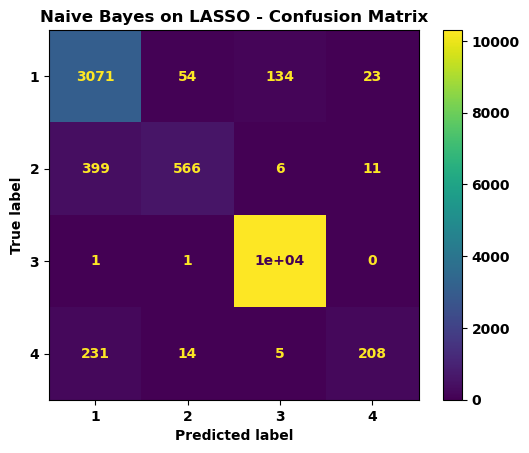


LDA on LASSO
Accuracy: 0.9067616132037801
Precision: 0.8207981600296997
Recall: 0.5586410842393202
F1 Score: 0.5714973664141539


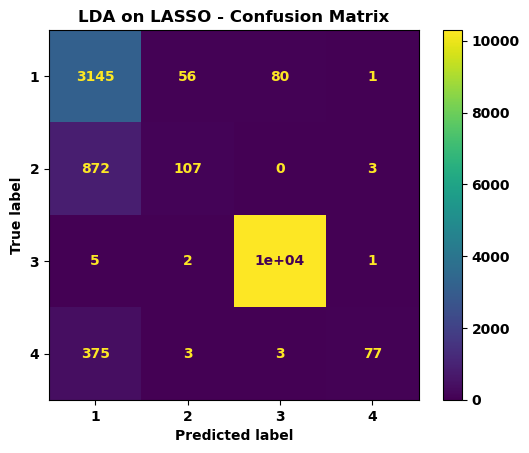

In [17]:
# Reduced Feature Sets
test_selected_features(X_pca, "PCA")
test_selected_features(X_chi2, "Chi2")
test_selected_features(X_mi, "Mutual Info")
test_selected_features(X_lasso, "LASSO")


Neural Network (Full Data)
Accuracy: 0.9755091175296153
Precision: 0.9375216913470777
Recall: 0.8612716621415106
F1 Score: 0.887650439465579


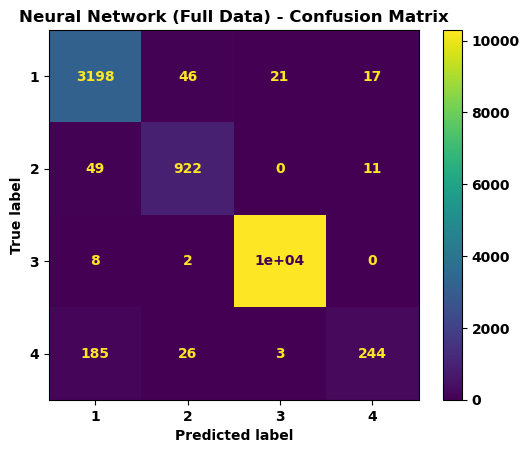


NN on PCA
Accuracy: 0.972514308531878
Precision: 0.9299576049166061
Recall: 0.8535012624472537
F1 Score: 0.8808027603467118


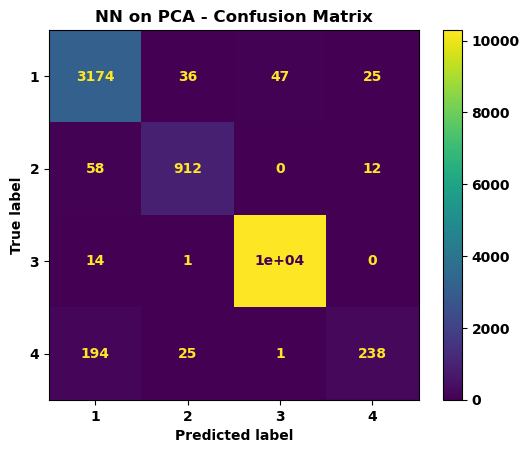


NN on LASSO
Accuracy: 0.9755091175296153
Precision: 0.9375216913470777
Recall: 0.8612716621415106
F1 Score: 0.887650439465579


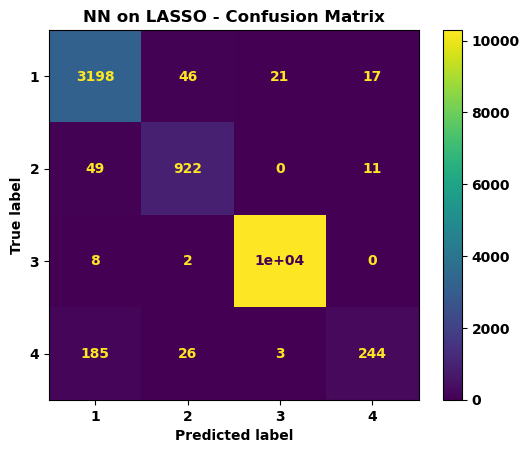

In [18]:
# Neural Network Comparisons
evaluate_model(MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42),
               X_train, X_test, y_train, y_test, "Neural Network (Full Data)")

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
evaluate_model(MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42),
               X_pca_train, X_pca_test, y_pca_train, y_pca_test, "NN on PCA")

X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X_lasso, y, test_size=0.2, random_state=42, stratify=y)
evaluate_model(MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42),
               X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test, "NN on LASSO")

The performance of classifiers varied across different feature spaces. When using the full dataset, most models particularly Support Vector Machines (SVM) and Neural Networks (NN) achieved high accuracy, with the NN performing well at 97.55% accuracy. Among the feature selection methods, LASSO was the most effective, as it retained critical features while maintaining the same performance as the full feature set for both traditional classifiers and the neural network. In contrast, Chi-Squared and Mutual Information showed some degradation in classifier performance, likely due to not preserving inter-feature dependencies as effectively as LASSO.

PCA proved beneficial in reducing dimensionality while retaining a high level of performance, but there was a slight drop in accuracy and recall compared to the full dataset and LASSO-based models. Although PCA is valuable for visualizing class separation and improving training speed, it discards label-related structure, which likely impacted the model’s ability to distinguish between minority classes.

The Neural Network consistently outperformed traditional classifiers across all feature spaces in terms of accuracy, precision, and F1 score. It demonstrated robustness on both full and reduced data, particularly with LASSO features. However, it was more sensitive to PCA reduction, with a slight drop in recall and F1 score.

Each approach has distinct strengths: full data ensures optimal accuracy, LASSO balances performance with interpretability and efficiency, and PCA provides a meaningful trade-off between speed and performance. Ultimately, for best overall performance and model efficiency, LASSO-based feature selection combined with a neural network offers the best result.